<a href="https://colab.research.google.com/github/naisyh/IR/blob/main/CorrelationsUpdated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Spearman Correlation Coefficients:
             P@10      P@50   MAP@100    MAP@20
P@10     1.000000  0.865256  0.940229  0.917755
P@50     0.865256  1.000000  0.845717  0.769468
MAP@100  0.940229  0.845717  1.000000  0.936703
MAP@20   0.917755  0.769468  0.936703  1.000000
Average Spearman Correlation: 0.9094


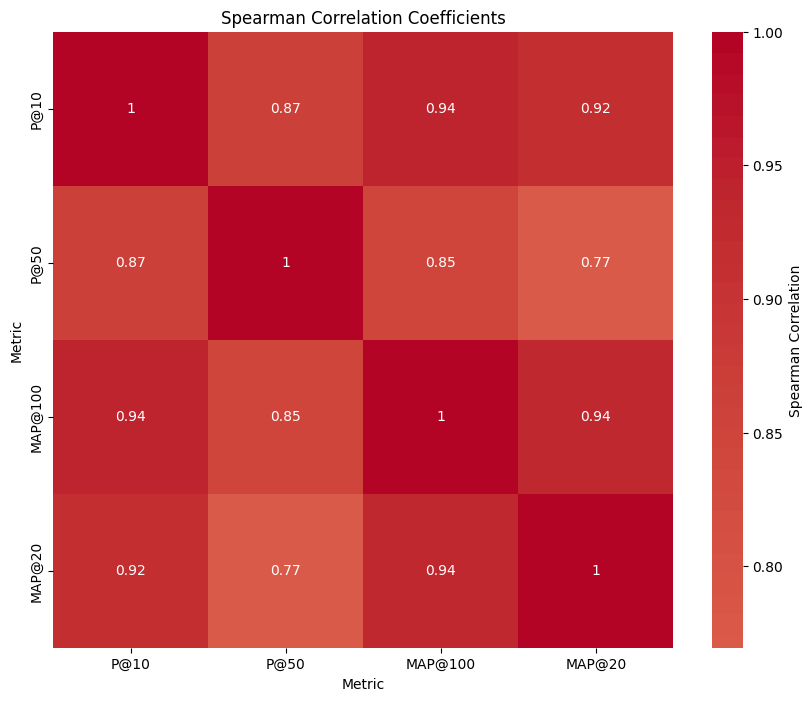

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from a CSV file
file_path = '/content/final_results (1).csv'  # Update the path to your CSV file
df = pd.read_csv(file_path)

# Assuming the CSV contains the columns: 'P@10', 'P@50', 'MAP@100', 'MAP@20'
metrics = ['P@10', 'P@50', 'MAP@100', 'MAP@20']

# Initialize a DataFrame to store Spearman correlations
spearman_correlations = pd.DataFrame(index=metrics, columns=metrics, dtype=float)

# Calculate Spearman correlations
for metric1 in metrics:
    for metric2 in metrics:
        spearman_corr = df[[metric1, metric2]].corr(method='spearman').iloc[0, 1]
        spearman_correlations.loc[metric1, metric2] = spearman_corr

# Print Spearman correlation coefficients
print("Spearman Correlation Coefficients:")
print(spearman_correlations)

# Calculate the average Spearman correlation
average_spearman_correlation = spearman_correlations.values.flatten().mean()
print(f"Average Spearman Correlation: {average_spearman_correlation:.4f}")

# Prepare data for the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlations, annot=True, cmap='coolwarm', center=0, cbar_kws={'label': 'Spearman Correlation'})
plt.title('Spearman Correlation Coefficients')
plt.xlabel('Metric')
plt.ylabel('Metric')
plt.show()







Spearman Correlation Matrix:
             P@10     P@100    MAP@10   MAP@100
P@10     1.000000  0.785277  0.863301  0.940229
P@100    0.785277  1.000000  0.652546  0.751333
MAP@10   0.863301  0.652546  1.000000  0.893962
MAP@100  0.940229  0.751333  0.893962  1.000000


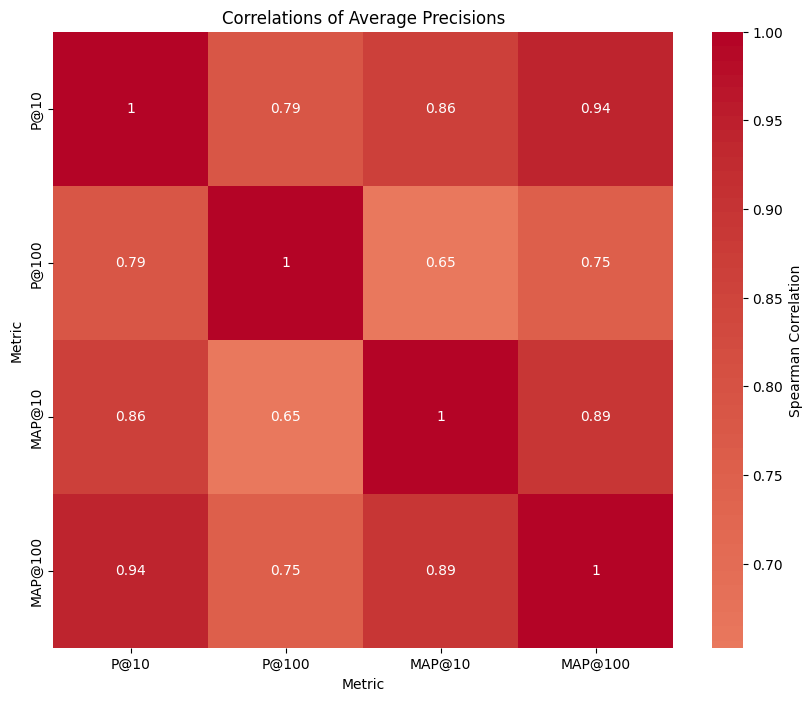

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from a CSV file
file_path = '/content/final_results (2).csv'  # Update the path to your CSV file
df = pd.read_csv(file_path)

# List of metrics to calculate average precision
metrics = ['P@10', 'P@100', 'MAP@10', 'MAP@100']

# Calculate the average for each metric
average_precisions = df[metrics].mean()

# Calculate Spearman correlations between average precisions
correlation_matrix = {}
for metric1 in metrics:
    for metric2 in metrics:
        corr = df[[metric1, metric2]].corr(method='spearman').iloc[0, 1]
        correlation_matrix[(metric1, metric2)] = corr

# Create a DataFrame from the correlation matrix
corr_df = pd.DataFrame(index=metrics, columns=metrics)

for (metric1, metric2), corr in correlation_matrix.items():
    corr_df.at[metric1, metric2] = corr

# Ensure all values are numeric and no NaN values are present
corr_df = corr_df.apply(pd.to_numeric, errors='coerce')
corr_df.dropna(how='all', inplace=True)

# Print the correlation matrix
print("Spearman Correlation Matrix:")
print(corr_df)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0, cbar_kws={'label': 'Spearman Correlation'})
plt.title('Correlations of Average Precisions')
plt.xlabel('Metric')
plt.ylabel('Metric')
plt.show()

